In [3]:
import numpy as np
import pandas as pd
load = pd.read_csv(r'C:\Users\dswat\OneDrive\Desktop\cyber\Cyber_Threat_Detection_csv.csv')
print(load.head())
print(load.shape)

                            Activity_ID      Source_IP   Destination_IP  \
0  782063c4-5d62-4967-94b0-aa8dda0d279e  66.121.199.57      12.38.57.39   
1  15926eac-ef4d-429a-b5b6-c8beff5317e4  47.18.115.148  187.117.145.176   
2  85682670-b0b1-4c73-929f-b9a6d19c2be4  121.30.68.138   195.253.255.91   
3  948dc744-b69b-47b4-b2c8-9147a0711687   94.222.0.245   30.200.224.102   
4  47bd1f3c-9c6b-42ce-84d3-63a2e55c74b8   116.89.78.44    34.40.172.245   

  Protocol     Port  Bytes_Transferred Connection_Type  \
0     ICMP   6353.0             8718.0        Incoming   
1     ICMP  55777.0             1255.0        Outgoing   
2     ICMP  52094.0                NaN        Incoming   
3      UDP      NaN                NaN        Incoming   
4      UDP  19970.0             8456.0        Incoming   

                                          User_Agent        Activity_Time  \
0  Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...  2020-04-16 14:00:00   
1  Mozilla/5.0 (compatible; MSIE 7.0; Windows 

In [5]:
load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Activity_ID        700 non-null    object 
 1   Source_IP          674 non-null    object 
 2   Destination_IP     700 non-null    object 
 3   Protocol           700 non-null    object 
 4   Port               665 non-null    float64
 5   Bytes_Transferred  675 non-null    float64
 6   Connection_Type    700 non-null    object 
 7   User_Agent         700 non-null    object 
 8   Activity_Time      700 non-null    object 
 9   Threat_Level       700 non-null    int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 54.8+ KB


In [7]:
load.describe()

,Port,Bytes_Transferred,Threat_Level
count,665.000000,675.000000,700.000000
mean,33262.221053,5057.075556,0.485714
std,18765.509914,2900.434125,0.500153
min,1030.000000,104.000000,0.000000
25%,17011.000000,2481.500000,0.000000
50%,32837.000000,5153.000000,0.000000
75%,49133.000000,7556.500000,1.000000
max,65509.000000,9975.000000,1.000000


In [9]:
load.drop(columns=['Activity_ID','Destination_IP'],inplace=True)
load.shape

(700, 8)

In [11]:
print(load.head())
load.isnull().sum()

       Source_IP Protocol     Port  Bytes_Transferred Connection_Type  \
0  66.121.199.57     ICMP   6353.0             8718.0        Incoming   
1  47.18.115.148     ICMP  55777.0             1255.0        Outgoing   
2  121.30.68.138     ICMP  52094.0                NaN        Incoming   
3   94.222.0.245      UDP      NaN                NaN        Incoming   
4   116.89.78.44      UDP  19970.0             8456.0        Incoming   

                                          User_Agent        Activity_Time  \
0  Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...  2020-04-16 14:00:00   
1  Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...  2023-01-17 08:00:00   
2  Mozilla/5.0 (X11; Linux i686) AppleWebKit/532....  2021-04-16 00:00:00   
3  Mozilla/5.0 (compatible; MSIE 7.0; Windows CE;...  2022-01-01 07:00:00   
4  Mozilla/5.0 (Windows NT 6.2; nr-ZA; rv:1.9.0.2...  2022-06-20 17:00:00   

   Threat_Level  
0             1  
1             1  
2             1  
3             0  
4       

In [13]:
data_col=load.columns.tolist()
print(data_col)
num_col=load.select_dtypes(include=['float64','int64'])
cat_col=load.select_dtypes(include=['object'])

['Source_IP', 'Protocol', 'Port', 'Bytes_Transferred', 'Connection_Type', 'User_Agent', 'Activity_Time', 'Threat_Level']


In [15]:
print(num_col)
print(cat_col)

        Port  Bytes_Transferred  Threat_Level
0     6353.0             8718.0             1
1    55777.0             1255.0             1
2    52094.0                NaN             1
3        NaN                NaN             0
4    19970.0             8456.0             0
..       ...                ...           ...
695      NaN             1261.0             0
696   9931.0             4727.0             0
697  57641.0             7401.0             1
698  10909.0             4658.0             0
699  38125.0             8339.0             0

[700 rows x 3 columns]
           Source_IP Protocol Connection_Type  \
0      66.121.199.57     ICMP        Incoming   
1      47.18.115.148     ICMP        Outgoing   
2      121.30.68.138     ICMP        Incoming   
3       94.222.0.245      UDP        Incoming   
4       116.89.78.44      UDP        Incoming   
..               ...      ...             ...   
695    61.80.119.156     ICMP        Outgoing   
696     22.6.190.222      UDP   

In [17]:
load[num_col.columns] = num_col.fillna(num_col.mean())
load.isnull().sum()
load[cat_col.columns]=cat_col.fillna(cat_col.mode().iloc[0])
load.isnull().sum()

Source_IP            0
Protocol             0
Port                 0
Bytes_Transferred    0
Connection_Type      0
User_Agent           0
Activity_Time        0
Threat_Level         0
dtype: int64

In [21]:
# lable encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in cat_col:
    load[col]=label_encoder.fit_transform(load[col])

In [23]:
#scaling min-max

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
load[num_col.columns]=scaler.fit_transform(load[num_col.columns])
load[cat_col.columns]=scaler.fit_transform(load[cat_col.columns])
print(load.head())


   Source_IP  Protocol      Port  Bytes_Transferred  Connection_Type  \
0   0.855869       0.0  0.082554           0.872657              0.0   
1   0.754829       0.0  0.849067           0.116604              1.0   
2   0.129272       0.0  0.791948           0.501781              0.0   
3   0.982169       1.0  0.499887           0.501781              0.0   
4   0.115899       1.0  0.293739           0.846115              0.0   

   User_Agent  Activity_Time  Threat_Level  
0    0.501466       0.060606           1.0  
1    0.536657       0.611833           1.0  
2    0.366569       0.238095           1.0  
3    0.519062       0.376623           0.0  
4    0.303519       0.480519           0.0  


In [25]:
#split data into train and test
x=load.drop('Threat_Level',axis=1)
y=load['Threat_Level']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [31]:
#evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred=logreg.predict(x_test)
logreg_accuracy=accuracy_score(y_test,logreg_pred)
logreg_conf=confusion_matrix(y_test,logreg_pred)

In [33]:
print("Logistic regression accuracy:",logreg_accuracy)
print("Logistic regression confusion matrix:\n",logreg_conf)

Logistic regression accuracy: 0.5476190476190477
Logistic regression confusion matrix:
 [[70 41]
 [54 45]]


In [35]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [39]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.46190476190476193
Random Forest Confusion Matrix:
 [[56 55]
 [58 41]]


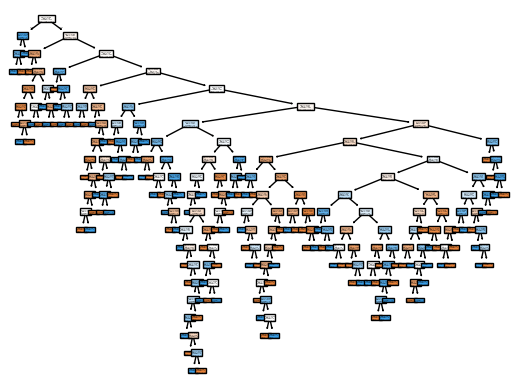

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plotting the first tree in the forest

plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [43]:
# Select the best model
best_model =logreg if logreg_accuracy >rf_accuracy else rf_model

# Save the best model as a .pkl file
import pickle

with open('best model.pkl','wb') as file:
    pickle.dump(best_model,file)

print("best model saved as 'best-model.pkl'")

best model saved as 'best-model.pkl'
